In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))
import pandas as pd
pd.set_option('display.width', 999)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_colwidth', 999)
pd.set_option('display.max_columns', 999)

C:\Users\ppark\AppData\Local\Temp\ipykernel_6180\2133568739.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
import pandas as pd
import polar as pl
from pptx import Presentation
%matplotlib inline

url = "https://raw.githubusercontent.com/pparkitn/imagehost/master/ACA_date.csv"
data_df=pd.read_csv(url)

Chart_list = pl.ACA_create_graphs(data_df,'date','label')
prs = Presentation()    
pl.create_title(prs,'ACA')
for chart in pl.ACA_create_graphs(data_df,'date','label'):
    pl.add_chart_slide(prs,chart[0],chart[1])
pl.save_presentation(prs,filename = 'ACA')

HTTPError: HTTP Error 404: Not Found

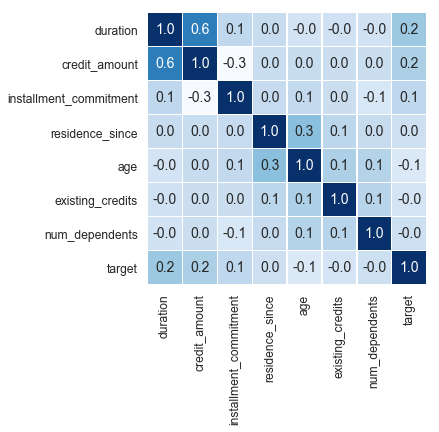

In [3]:
import pandas as pd
import openml
import polar as pl

dataset = openml.datasets.get_dataset(31)
X, y, categorical_indicator, attribute_names = \
dataset.get_data(target=dataset.default_target_attribute,dataset_format='dataframe')

openml_df = pd.DataFrame(X)
openml_df['target'] = y

data_df = pl.analyze_correlation(openml_df,'target')
pl.get_heatmap(data_df,'heat_map_1.jpg',1.1,14,'0.1f',0,600,5,5)

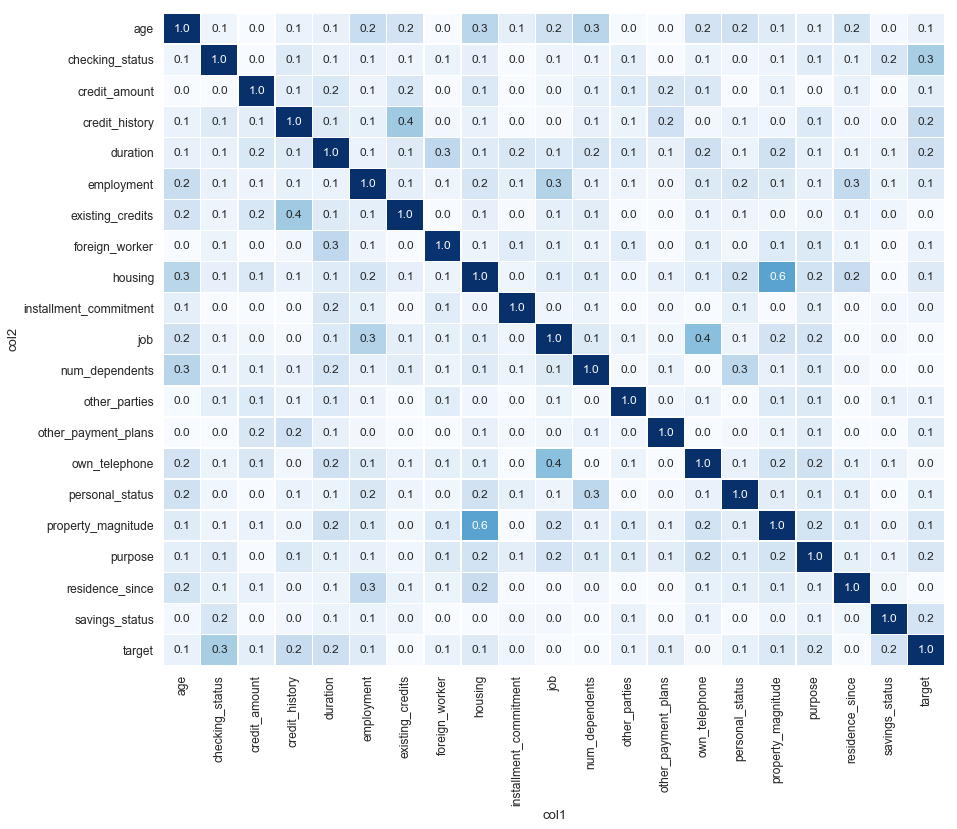

In [4]:
data_df = pl.analyze_association(openml_df,'target',verbose=0)
pl.get_heatmap(data_df,'heat_map_2.jpg',1.1,12,'0.1f')

In [5]:
print(pl.analyze_df(openml_df, 'target',10))

(            var_name  target  TotalSize      good       bad                      col_name
0       10.0-To-12.0     216      0.216  0.759259  0.240741                duration_gp_rg
1       13.0-To-18.0     187      0.187  0.700535  0.299465                duration_gp_rg
2       20.0-To-24.0     224      0.224  0.705357  0.294643                duration_gp_rg
3       26.0-To-36.0     143      0.143  0.601399  0.398601                duration_gp_rg
4       39.0-To-72.0      87      0.087  0.482759  0.517241                duration_gp_rg
5         4.0-To-9.0     143      0.143  0.832168  0.167832                duration_gp_rg
0   1271.0-To-1494.0     101      0.101  0.742574  0.257426           credit_amount_gp_rg
1   1495.0-To-1922.0     101      0.101  0.762376  0.237624           credit_amount_gp_rg
2   1924.0-To-2329.0     101      0.101  0.722772  0.277228           credit_amount_gp_rg
3   2331.0-To-2899.0     101      0.101  0.762376  0.237624           credit_amount_gp_rg
4     250

using RandomForestClassifier


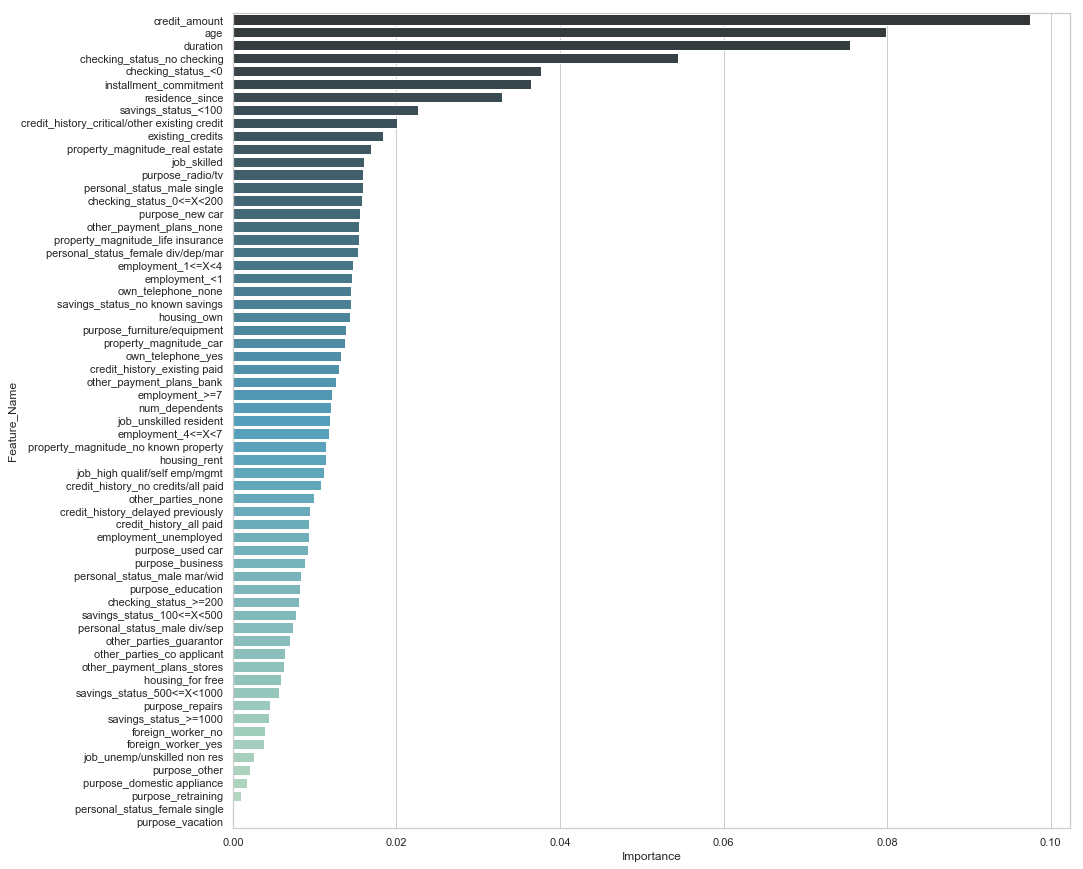

In [6]:
data_df = pl.get_important_features(openml_df,'target')
pl.get_bar(data_df,'bar.jpg','Importance','Feature_Name')

In [7]:
import pandas as pd
import polar as pl
from cryptography.fernet import Fernet

url = "https://raw.githubusercontent.com/pparkitn/imagehost/master/test_real_or_not_from_kaggle.csv"
data_df=pd.read_csv(url)

data_df.drop(columns=['id','keyword','location'], inplace=True)
data_df.head(3)

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, stay safe everyone."
2,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"


In [8]:
key = Fernet.generate_key()
data_df['text_encrypted'] =  data_df['text'].apply(pl.encrypt_df,args=(key,))
data_df['text_decrypted'] =  data_df['text_encrypted'].apply(pl.decrypt_df,args=(key,))

data_df['text_stem'] = data_df['text_decrypted'].apply(pl.nlp_text_process,args=('stem',))
data_df['text_stem_lem'] = data_df['text_stem'].apply(pl.nlp_text_process,args=('lem',))

data_df.head(3)

,text,text_encrypted,text_decrypted,text_stem,text_stem_lem
0,Just happened a terrible car crash,gAAAAABeNEMfDEQ6rsRhvhu3SzfqQ_oqo61r4oTcXo-1utzMPh4zBMpZfRPn5MdZ6ZaabSdgBspbBIkSVXdxTy8BtUBZ7mHFn5NcRIa2rv3Kk-1ewYOHt97k6xH1Rn7qnSdVrMILSOqz,Just happened a terrible car crash,just happen a terribl car crash,just happen a terribl car crash
1,"Heard about #earthquake is different cities, stay safe everyone.",gAAAAABeNEMfaTx_WImicWuWGjSbzQ5TwAUidqpH_gla4HYi71D5IgvYc75PdrYHDiHRw81LuDsw1f2AvlPobpo4hdNurbMpHyCyP6YlHmfPzbeWEIxfn0WPL7UvSmEHQmPHnacPRH7VbOkPIKw6PMRapejzIInqPUx2THHgOpiz41O3OgyHTHA=,"Heard about #earthquake is different cities, stay safe everyone.","heard about #earthquak is differ cities, stay safe everyone.","heard about #earthquak is differ cities, stay safe everyone."
2,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all",gAAAAABeNEMf9wrKjj3r8PpfsnsA2RLyNGeACmGYkiatPI6t_L8e7cOxl_2agSt6afYw8o1DtHtZfcKsQ2VzHmew5zIzOfIbL9aaZxEwwS0gSCKirCjyK66aK-N79U24zQLtsmZ5muVSbK3n0JJ185COC_Uo2tG3HYyMVKyR1J5Zrwvy8OK_yBzBSLVmaXGtZS5m-pzzSZqPb6ZSG2lXmcy9j0p30x2NwA==,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all","there is a forest fire at spot pond, gees are flee across the street, I cannot save them all","there is a forest fire at spot pond, gee are flee across the street, I cannot save them all"


In [9]:
cluster_df = pl.nlp_cluster(data_df,cluster_column = 'text_stem_lem', clusters = 10, prediction_col = 'text_cluster',max_df_val = 0.8 ,min_df_val = 5 ,max_iter_val=100 , n_init_val = 1 )
cluster_df.groupby(['text_cluster']).count()

,text,text_encrypted,text_decrypted,text_stem,text_stem_lem
text_cluster,,,,,
0,1140,1140,1140,1140,1140
1,161,161,161,161,161
2,99,99,99,99,99
3,196,196,196,196,196
4,1121,1121,1121,1121,1121
5,58,58,58,58,58
6,123,123,123,123,123
7,53,53,53,53,53
8,149,149,149,149,149


In [10]:
cluster_df[cluster_df['text_cluster']==3]['text_stem_lem']

54                                                                                                                aftershock https://t.co/ecy4u623no
59                                                                                                                aftershock https://t.co/38nhq9moef
79                   shot 12 times. found dead in cuff after be involv in a car accident. offic told ambul not to treat him. https://t.co/meudjwaang
95                                'if your natur appropri it love will burn you until you becom annihil in your beloved...'  https://t.co/smlwjund09
106                   u. nation park servic tonto nation forest: stop the annihil of the salt river wild horse... https://t.co/latvr8rzck via @chang
108                                                       ***latest updat on the salt river wild hors round-up*** https://t.co/wjscdvcevh via @chang
109                   u. nation park servic tonto nation forest: stop the annihil of the salt river wild h